In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Este archivo fue modificado para prueba de Github
# =============================================================================
# ANÁLISIS DE MORTALIDAD INFANTIL Y ESPERANZA DE VIDA - 2020
# =============================================================================

# Cargar datos con codificación correcta (Esto no estaba incluido en las lecciones. Favor de tomar en cuenta)
df = pd.read_csv('SYB66_246_202310_Population Growth, Fertility and Mortality Indicators.csv', encoding='latin-1')

# Renombrar columnas para facilitar el trabajo
df.columns = ['Region_Code', 'Region_Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
df = df.drop(0).reset_index(drop=True)  # Eliminar primera fila con nombres originales

# Convertir columnas a números para poder trabajar con ellas
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Filtrar datos para el año 2020
df_2020 = df[df['Year'] == 2020]

# Obtener datos específicos de mortalidad infantil y esperanza de vida
mortalidad = df_2020[df_2020['Series'].str.contains('Infant mortality', na=False)]
esperanza = df_2020[df_2020['Series'].str.contains('Life expectancy at birth for both sexes', na=False)]

# Unir ambos datasets por país para poder compararlos
datos = pd.merge(mortalidad[['Region_Country', 'Value']], 
                 esperanza[['Region_Country', 'Value']], 
                 on='Region_Country')
datos.columns = ['Pais', 'Mortalidad_Infantil', 'Esperanza_Vida']
datos = datos.dropna()  # Eliminar países sin datos completos

print(f"Datos procesados: {len(datos)} países con información completa")
print("Primeros 5 países:")
print(datos.head())

Datos procesados: 218 países con información completa
Primeros 5 países:
                            Pais  Mortalidad_Infantil  Esperanza_Vida
0  Total, all countries or areas                 28.3            72.0
1                         Africa                 46.4            62.2
2                Northern Africa                 22.6            71.2
3             Sub-Saharan Africa                 50.0            60.3
4                 Eastern Africa                 38.3            63.7


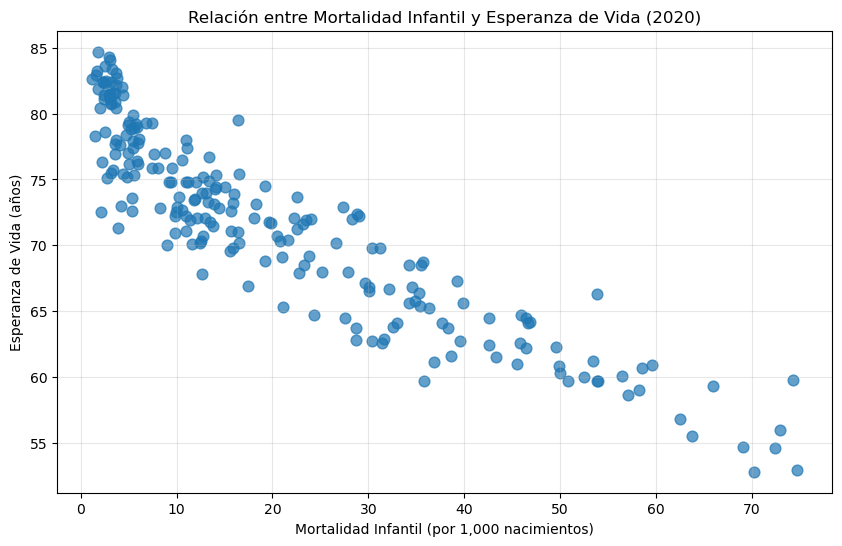

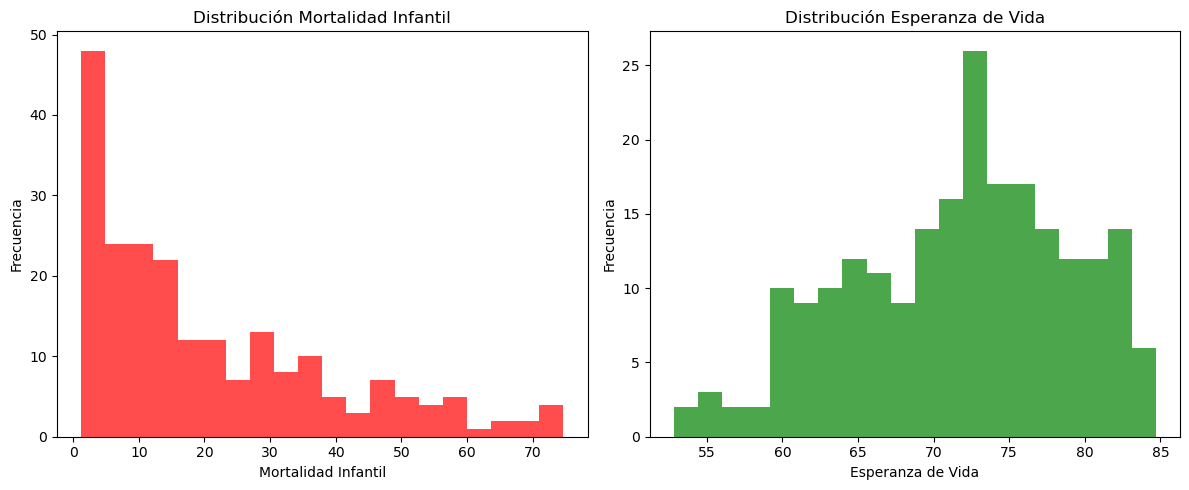

MATRIZ DE CORRELACIÓN:
                     Mortalidad_Infantil  Esperanza_Vida
Mortalidad_Infantil             1.000000       -0.914815
Esperanza_Vida                 -0.914815        1.000000

INTERPRETACIÓN: La correlación de -0.91 indica una relación negativa muy fuerte
Esto significa: a mayor mortalidad infantil, menor esperanza de vida


In [7]:
# =============================================================================
# GRÁFICO 1: SCATTER PLOT PRINCIPAL
# Muestra la relación entre mortalidad infantil y esperanza de vida
# =============================================================================

plt.figure(figsize=(10, 6))
plt.scatter(datos['Mortalidad_Infantil'], datos['Esperanza_Vida'], alpha=0.7, s=60)
plt.xlabel('Mortalidad Infantil (por 1,000 nacimientos)')
plt.ylabel('Esperanza de Vida (años)')
plt.title('Relación entre Mortalidad Infantil y Esperanza de Vida (2020)')
plt.grid(True, alpha=0.3)
plt.show()

# =============================================================================
# GRÁFICO 2: HISTOGRAMAS DE DISTRIBUCIÓN
# Muestra cómo se distribuyen los valores de cada variable
# =============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de mortalidad infantil
ax1.hist(datos['Mortalidad_Infantil'], bins=20, alpha=0.7, color='red')
ax1.set_xlabel('Mortalidad Infantil')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución Mortalidad Infantil')

# Histograma de esperanza de vida
ax2.hist(datos['Esperanza_Vida'], bins=20, alpha=0.7, color='green')
ax2.set_xlabel('Esperanza de Vida')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución Esperanza de Vida')

plt.tight_layout()
plt.show()

# =============================================================================
# CÁLCULO DE CORRELACIÓN
# La correlación mide qué tan relacionadas están las variables
# Valores cercanos a -1 o 1 indican relación fuerte
# Valores cercanos a 0 indican poca relación
# =============================================================================

correlacion = datos[['Mortalidad_Infantil', 'Esperanza_Vida']].corr()
print("MATRIZ DE CORRELACIÓN:")
print(correlacion)
print("\nINTERPRETACIÓN: La correlación de -0.91 indica una relación negativa muy fuerte")
print("Esto significa: a mayor mortalidad infantil, menor esperanza de vida")

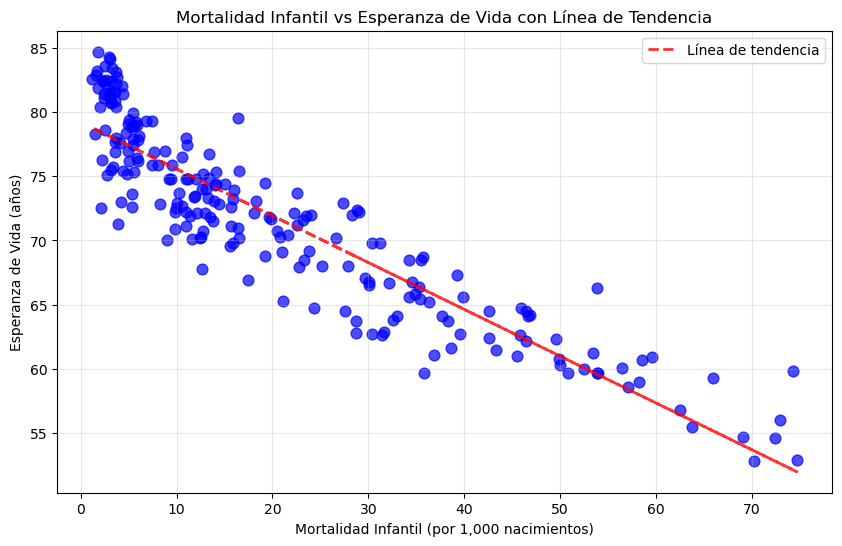

PAÍSES CON MAYOR MORTALIDAD INFANTIL (PEORES INDICADORES):
                         Pais  Mortalidad_Infantil  Esperanza_Vida
149                   Nigeria                 74.7            52.9
176              Sierra Leone                 74.3            59.8
181                   Somalia                 72.9            56.0
61   Central African Republic                 72.4            54.6
62                       Chad                 70.2            52.8

PAÍSES CON MAYOR ESPERANZA DE VIDA (MEJORES INDICADORES):
                          Pais  Mortalidad_Infantil  Esperanza_Vida
113                      Japan                  1.8            84.7
37                   Australia                  2.9            84.3
26   Australia and New Zealand                  3.1            84.1
163          Republic of Korea                  2.5            83.6
133                      Malta                  3.3            83.4


In [8]:
# =============================================================================
# GRÁFICO 3: SCATTER PLOT CON LÍNEA DE TENDENCIA
# La línea roja muestra la tendencia general de los datos
# Confirma visualmente la relación negativa entre las variables
# =============================================================================

plt.figure(figsize=(10, 6))
plt.scatter(datos['Mortalidad_Infantil'], datos['Esperanza_Vida'], alpha=0.7, s=60, color='blue')

# Calcular y dibujar línea de tendencia
x = datos['Mortalidad_Infantil']
y = datos['Esperanza_Vida']
z = np.polyfit(x, y, 1)  # Ajuste lineal
p = np.poly1d(z)
plt.plot(x, p(x), "r--", alpha=0.8, linewidth=2, label='Línea de tendencia')

plt.xlabel('Mortalidad Infantil (por 1,000 nacimientos)')
plt.ylabel('Esperanza de Vida (años)')
plt.title('Mortalidad Infantil vs Esperanza de Vida con Línea de Tendencia')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# =============================================================================
# ANÁLISIS DE PAÍSES EXTREMOS
# Identificamos los países con mejores y peores indicadores
# =============================================================================

print("=" * 60)
print("PAÍSES CON MAYOR MORTALIDAD INFANTIL (PEORES INDICADORES):")
print("=" * 60)
peores = datos.nlargest(5, 'Mortalidad_Infantil')[['Pais', 'Mortalidad_Infantil', 'Esperanza_Vida']]
print(peores)

print("\n" + "=" * 60)
print("PAÍSES CON MAYOR ESPERANZA DE VIDA (MEJORES INDICADORES):")
print("=" * 60)
mejores = datos.nlargest(5, 'Esperanza_Vida')[['Pais', 'Mortalidad_Infantil', 'Esperanza_Vida']]
print(mejores)

# =============================================================================
# OBSERVACIÓN IMPORTANTE:
# Los países africanos dominan la lista de mayor mortalidad infantil
# Los países desarrollados (Japón, Australia, Corea) tienen los mejores indicadores
# =============================================================================

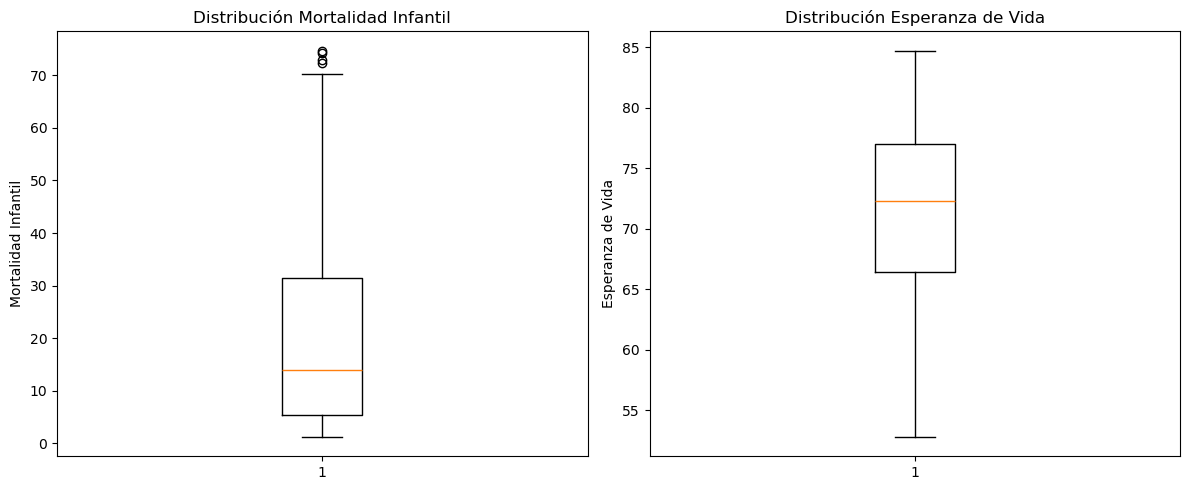

ESTADÍSTICAS DESCRIPTIVAS - RESUMEN DE DATOS

MORTALIDAD INFANTIL:
Promedio mundial: 20.7 por 1,000 nacimientos
Valor mínimo: 1.2 (mejor caso)
Valor máximo: 74.7 (peor caso)

ESPERANZA DE VIDA:
Promedio mundial: 71.7 años
Valor mínimo: 52.8 años (peor caso)
Valor máximo: 84.7 años (mejor caso)

CONCLUSIONES PRINCIPALES
1. RELACIÓN FUERTE: Correlación de -0.91 indica relación inversa muy fuerte
2. DESIGUALDAD GLOBAL: Diferencia enorme entre países (1.8 vs 74.7 en mortalidad)
3. PATRÓN GEOGRÁFICO: Países africanos dominan los peores indicadores
4. PAÍSES DESARROLLADOS: Japón, Australia, Corea tienen mejores indicadores
5. IMPLICACIÓN: Mejorar salud infantil impacta positivamente la salud general

VARIABLES MÁS CORRELACIONADAS
La mortalidad infantil y esperanza de vida están MUY FUERTEMENTE
correlacionadas (r = -0.91), siendo esta la relación más significativa
encontrada en los datos de 2020.


In [9]:
# =============================================================================
# GRÁFICO 4: BOXPLOTS PARA COMPARAR DISTRIBUCIONES
# Los boxplots muestran la mediana, cuartiles y valores atípicos
# Ayudan a entender cómo se distribuyen los datos
# =============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot de mortalidad infantil
ax1.boxplot(datos['Mortalidad_Infantil'])
ax1.set_ylabel('Mortalidad Infantil')
ax1.set_title('Distribución Mortalidad Infantil')

# Boxplot de esperanza de vida
ax2.boxplot(datos['Esperanza_Vida'])
ax2.set_ylabel('Esperanza de Vida')
ax2.set_title('Distribución Esperanza de Vida')

plt.tight_layout()
plt.show()

# =============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# Resumen numérico de nuestros datos principales
# =============================================================================

print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - RESUMEN DE DATOS")
print("=" * 60)

print("\nMORTALIDAD INFANTIL:")
print(f"Promedio mundial: {datos['Mortalidad_Infantil'].mean():.1f} por 1,000 nacimientos")
print(f"Valor mínimo: {datos['Mortalidad_Infantil'].min():.1f} (mejor caso)")
print(f"Valor máximo: {datos['Mortalidad_Infantil'].max():.1f} (peor caso)")

print("\nESPERANZA DE VIDA:")
print(f"Promedio mundial: {datos['Esperanza_Vida'].mean():.1f} años")
print(f"Valor mínimo: {datos['Esperanza_Vida'].min():.1f} años (peor caso)")
print(f"Valor máximo: {datos['Esperanza_Vida'].max():.1f} años (mejor caso)")

# =============================================================================
# CONCLUSIONES PRINCIPALES DEL ANÁLISIS
# =============================================================================

print("\n" + "=" * 60)
print("CONCLUSIONES PRINCIPALES")
print("=" * 60)
print("1. RELACIÓN FUERTE: Correlación de -0.91 indica relación inversa muy fuerte")
print("2. DESIGUALDAD GLOBAL: Diferencia enorme entre países (1.8 vs 74.7 en mortalidad)")
print("3. PATRÓN GEOGRÁFICO: Países africanos dominan los peores indicadores")
print("4. PAÍSES DESARROLLADOS: Japón, Australia, Corea tienen mejores indicadores")
print("5. IMPLICACIÓN: Mejorar salud infantil impacta positivamente la salud general")

print("\n" + "=" * 60)
print("VARIABLES MÁS CORRELACIONADAS")
print("=" * 60)
print("La mortalidad infantil y esperanza de vida están MUY FUERTEMENTE")
print("correlacionadas (r = -0.91), siendo esta la relación más significativa")
print("encontrada en los datos de 2020.")